In [2]:
import pandas as pd
import numpy as np


In [22]:
#Load the data
df=pd.read_csv('imputed_covid_data_m2_modified.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236526 entries, 0 to 236525
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   USMER           236526 non-null  int64  
 1   SEX             236526 non-null  int64  
 2   PATIENT_TYPE    236526 non-null  int64  
 3   INTUBED         236526 non-null  float64
 4   PNEUMONIA       229339 non-null  float64
 5   AGE             236526 non-null  int64  
 6   DIABETES        233686 non-null  float64
 7   COPD            233997 non-null  float64
 8   ASTHMA          234020 non-null  float64
 9   INMSUPR         233600 non-null  float64
 10  HIPERTENSION    233906 non-null  float64
 11  OTHER_DISEASE   232164 non-null  float64
 12  CARDIOVASCULAR  233923 non-null  float64
 13  OBESITY         233972 non-null  float64
 14  RENAL_CHRONIC   233995 non-null  float64
 15  TOBACCO         233788 non-null  float64
 16  ICU             236526 non-null  float64
 17  DIED      

In [23]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222655 entries, 0 to 222654
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   USMER           222655 non-null  int64  
 1   SEX             222655 non-null  int64  
 2   PATIENT_TYPE    222655 non-null  int64  
 3   INTUBED         222655 non-null  float64
 4   PNEUMONIA       222655 non-null  float64
 5   AGE             222655 non-null  int64  
 6   DIABETES        222655 non-null  float64
 7   COPD            222655 non-null  float64
 8   ASTHMA          222655 non-null  float64
 9   INMSUPR         222655 non-null  float64
 10  HIPERTENSION    222655 non-null  float64
 11  OTHER_DISEASE   222655 non-null  float64
 12  CARDIOVASCULAR  222655 non-null  float64
 13  OBESITY         222655 non-null  float64
 14  RENAL_CHRONIC   222655 non-null  float64
 15  TOBACCO         222655 non-null  float64
 16  ICU             222655 non-null  float64
 17  DIED      

In [35]:
#data spliting
from sklearn.model_selection import train_test_split
x=df.drop(columns=['INTUBED','DIED'])
y=df['INTUBED']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
for col in x.columns:
    if col != "AGE":
        df[col] = df[col].astype(str)

In [ ]:
#encoding
from sklearn.preprocessing import OneHotEncoder
en=df.drop(columns=['AGE','INTUBED','DIED'])
categorical_cols= en.columns.tolist()

# Create the OneHotEncoder instance and fit it to the training data
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(X_train[categorical_cols])  

X_train_encoded = encoder.transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])


In [55]:
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols))
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols))

In [56]:
X_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44531 entries, 0 to 44530
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   USMER_0             44531 non-null  float64
 1   USMER_1             44531 non-null  float64
 2   SEX_0               44531 non-null  float64
 3   SEX_1               44531 non-null  float64
 4   PATIENT_TYPE_0      44531 non-null  float64
 5   PATIENT_TYPE_1      44531 non-null  float64
 6   PNEUMONIA_0.0       44531 non-null  float64
 7   PNEUMONIA_1.0       44531 non-null  float64
 8   DIABETES_0.0        44531 non-null  float64
 9   DIABETES_1.0        44531 non-null  float64
 10  COPD_0.0            44531 non-null  float64
 11  COPD_1.0            44531 non-null  float64
 12  ASTHMA_0.0          44531 non-null  float64
 13  ASTHMA_1.0          44531 non-null  float64
 14  INMSUPR_0.0         44531 non-null  float64
 15  INMSUPR_1.0         44531 non-null  float64
 16  HIPE

In [57]:
#add age column to the encoded data
X_train_encoded['AGE'] = X_train['AGE'].values
X_test_encoded['AGE'] = X_test['AGE'].values
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178124 entries, 0 to 178123
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   USMER_0             178124 non-null  float64
 1   USMER_1             178124 non-null  float64
 2   SEX_0               178124 non-null  float64
 3   SEX_1               178124 non-null  float64
 4   PATIENT_TYPE_0      178124 non-null  float64
 5   PATIENT_TYPE_1      178124 non-null  float64
 6   PNEUMONIA_0.0       178124 non-null  float64
 7   PNEUMONIA_1.0       178124 non-null  float64
 8   DIABETES_0.0        178124 non-null  float64
 9   DIABETES_1.0        178124 non-null  float64
 10  COPD_0.0            178124 non-null  float64
 11  COPD_1.0            178124 non-null  float64
 12  ASTHMA_0.0          178124 non-null  float64
 13  ASTHMA_1.0          178124 non-null  float64
 14  INMSUPR_0.0         178124 non-null  float64
 15  INMSUPR_1.0         178124 non-nul

In [58]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_balanced, y_balanced = smt.fit_resample(X_train_encoded, y_train)


In [59]:
X_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299516 entries, 0 to 299515
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   USMER_0             299516 non-null  float64
 1   USMER_1             299516 non-null  float64
 2   SEX_0               299516 non-null  float64
 3   SEX_1               299516 non-null  float64
 4   PATIENT_TYPE_0      299516 non-null  float64
 5   PATIENT_TYPE_1      299516 non-null  float64
 6   PNEUMONIA_0.0       299516 non-null  float64
 7   PNEUMONIA_1.0       299516 non-null  float64
 8   DIABETES_0.0        299516 non-null  float64
 9   DIABETES_1.0        299516 non-null  float64
 10  COPD_0.0            299516 non-null  float64
 11  COPD_1.0            299516 non-null  float64
 12  ASTHMA_0.0          299516 non-null  float64
 13  ASTHMA_1.0          299516 non-null  float64
 14  INMSUPR_0.0         299516 non-null  float64
 15  INMSUPR_1.0         299516 non-nul

In [60]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# initialize the model
lgbm = lgb.LGBMClassifier(random_state=42)

# fitting the model
lgbm.fit(X_balanced, y_balanced, eval_set=[(X_balanced, y_balanced)], eval_metric='logloss')

# Predict on validation set
val_preds = lgbm.predict(X_balanced)

# Evaluate
val_accuracy = accuracy_score(y_balanced, val_preds)
print("Validation Accuracy:", val_accuracy)

[LightGBM] [Info] Number of positive: 149758, number of negative: 149758
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.103635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8271
[LightGBM] [Info] Number of data points in the train set: 299516, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Validation Accuracy: 0.8174388012660425


In [62]:
test_preds = lgbm.predict(X_test_encoded)
test_accuracy = accuracy_score(y_test, test_preds)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7561923154656307


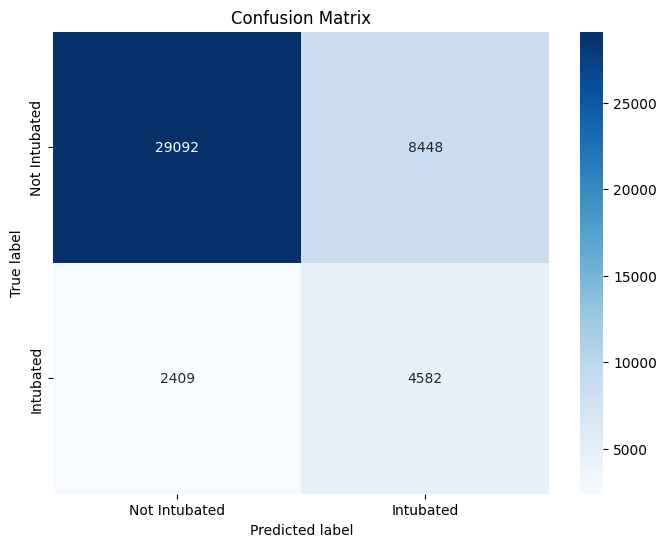

               precision    recall  f1-score   support

Not Intubated       0.92      0.77      0.84     37540
    Intubated       0.35      0.66      0.46      6991

     accuracy                           0.76     44531
    macro avg       0.64      0.72      0.65     44531
 weighted avg       0.83      0.76      0.78     44531



In [63]:
# confusion matrix
cm = confusion_matrix(y_test, test_preds)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Intubated', 'Intubated'], yticklabels=['Not Intubated', 'Intubated'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()
# classification report
print(classification_report(y_test, test_preds, target_names=['Not Intubated', 'Intubated']))


In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

 
# Initialize the model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model
log_reg.fit(X_balanced, y_balanced)

# Predict on validation set
val_preds_log_reg = log_reg.predict(X_train_encoded)
# Evaluate  
val_accuracy_log_reg = accuracy_score(y_train, val_preds_log_reg)
print("Validation Accuracy (Logistic Regression):", val_accuracy_log_reg)

Validation Accuracy (Logistic Regression): 0.6963463654532798


In [66]:
#test set predictions
test_preds_log_reg = log_reg.predict(X_test_encoded)
test_accuracy_log_reg = accuracy_score(y_test, test_preds_log_reg)
print("Test Accuracy (Logistic Regression):", test_accuracy_log_reg)

Test Accuracy (Logistic Regression): 0.6987042734275


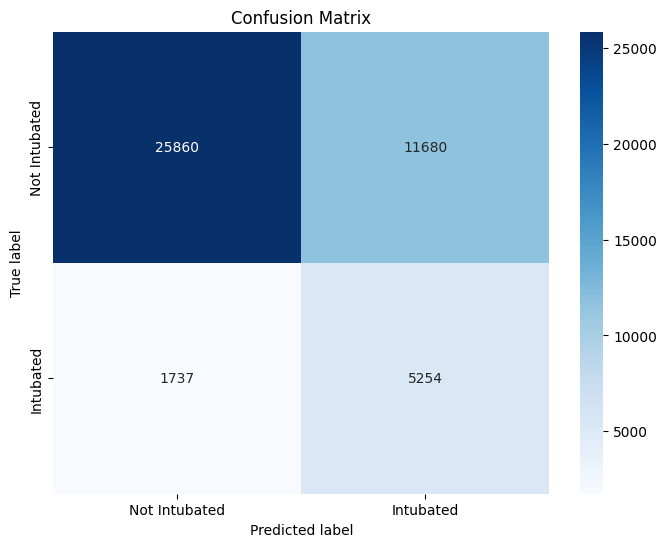

               precision    recall  f1-score   support

Not Intubated       0.94      0.69      0.79     37540
    Intubated       0.31      0.75      0.44      6991

     accuracy                           0.70     44531
    macro avg       0.62      0.72      0.62     44531
 weighted avg       0.84      0.70      0.74     44531



In [67]:
cm = confusion_matrix(y_test, test_preds_log_reg)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Intubated', 'Intubated'], yticklabels=['Not Intubated', 'Intubated'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()
# classification report
print(classification_report(y_test, test_preds_log_reg, target_names=['Not Intubated', 'Intubated']))

In [68]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators = 200, 
                    learning_rate=0.1)

xgb.fit(X_balanced, y_balanced)

pred = xgb.predict(X_train_encoded)

In [70]:
from sklearn.metrics import accuracy_score

# Predict
test_preds_xgb = xgb.predict(X_test_encoded)

# Accuracy
test_accuracy_xgb = accuracy_score(y_test, test_preds_xgb)

# Output
print("Test Accuracy (XGBoost):", test_accuracy_xgb)
print("Predictions:", test_preds_xgb)

Test Accuracy (XGBoost): 0.7604814623520694
Predictions: [0 0 1 ... 0 1 1]


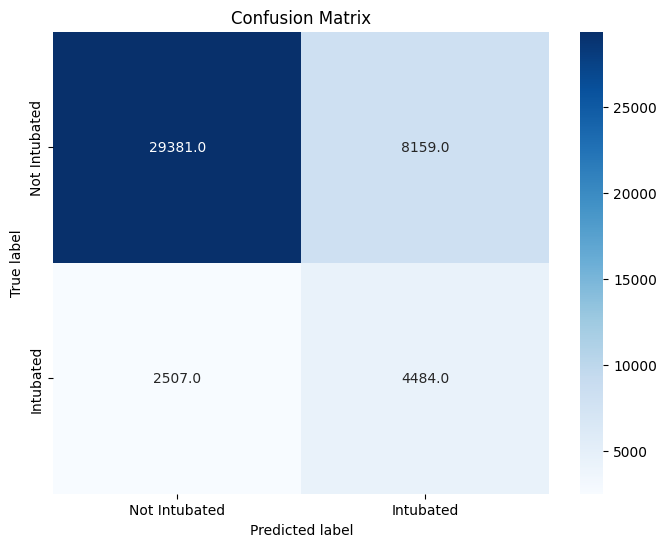

               precision    recall  f1-score   support

Not Intubated       0.92      0.78      0.85     37540
    Intubated       0.35      0.64      0.46      6991

     accuracy                           0.76     44531
    macro avg       0.64      0.71      0.65     44531
 weighted avg       0.83      0.76      0.79     44531



In [71]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix
cm = confusion_matrix(y_test, test_preds_xgb)
cm_percent = cm.astype('float') / cm.sum() * 100  
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.1f', cmap='Blues', xticklabels=['Not Intubated', 'Intubated'], yticklabels=['Not Intubated', 'Intubated'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()
# classification report
print(classification_report(y_test, test_preds_xgb, target_names=['Not Intubated', 'Intubated']))

In [72]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_balanced, y_balanced)

# Make predictions
y_pred = rf_model.predict(X_test_encoded)


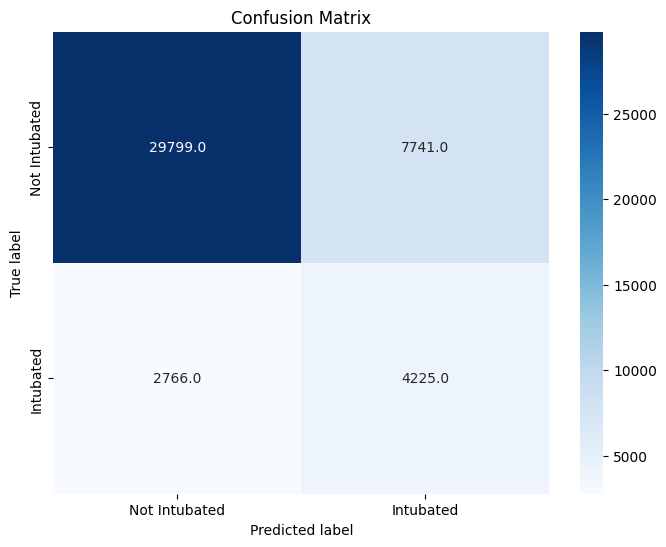

               precision    recall  f1-score   support

Not Intubated       0.92      0.79      0.85     37540
    Intubated       0.35      0.60      0.45      6991

     accuracy                           0.76     44531
    macro avg       0.63      0.70      0.65     44531
 weighted avg       0.83      0.76      0.79     44531



In [73]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_percent = cm.astype('float') / cm.sum() * 100  
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.1f', cmap='Blues', xticklabels=['Not Intubated', 'Intubated'], yticklabels=['Not Intubated', 'Intubated'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()
# classification report
print(classification_report(y_test, y_pred, target_names=['Not Intubated', 'Intubated']))

In [74]:
# Save the best model
import joblib
import pickle
joblib.dump(xgb, 'Intubed_model_bestfinal.pkl')
joblib.dump(X_balanced.columns.tolist(), "Intubed_features.pkl")

# Later on, you can load the model like this:
loaded_model = joblib.load('Intubed_model_bestfinal.pkl')
loaded_features = joblib.load("Intubed_features.pkl")
with open('encoder_Intubed.pkl', 'wb') as f:
    pickle.dump(encoder, f)
